In [2]:
# Brenda Woodard
# Data Mining Classwork Week 10

import numpy as np
import math
import pandas as pd
from sklearn import tree
from sklearn.naive_bayes import *
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.inspection import permutation_importance
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import Birch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt

In [3]:
# Part 1:  PCA

# Principle Component Analysis (PCA) can be used to reduce the time needed to build machine learning models.  You are to
# apply PCA the weather prediction data set using GausianNP in sklearn ash show in the reading for today: this web article 
#     (Links to an external site.).

# First create a table (or chart) of the explained_variance_ratio_ for the data set.  
# Then run your models for 1, 2, 3, 4, 5, 6, 7, 8, and all components.  
# Create a table (or chart) showing the accuracy as a function of the number of  components.

# And this is the datafile (same one as last week for predicting rain):
weather = pd.read_csv('cleanInfile.csv')

In [4]:
# To get you going you may want to use this code as a starting point: 

def runGaussianNB():
	global gausianNB_predicted
	print("\n\nGausianNB:")
	model = GaussianNB()
	model.fit(x_train,y_train)
	gausianNB_predicted = model.predict(x_test)
	print('\nconfusion_matrix from Gaussian naive bayes:')
	print(confusion_matrix( y_test, gausianNB_predicted ) )
	accuracy = accuracy_score(y_test, gausianNB_predicted)
	print('accuracy = ' + str(accuracy))
	imps = permutation_importance(model, x_test, y_test)
	print("gaussinaNB feature importance:")
	print(imps.importances_mean)

df = pd.read_csv('cleanInfile.csv')
print(df)

Y = df['RainTomorrow']
print(Y)

df = df.drop('RainTomorrow',axis=1)
print(df.head())
x_train, x_test, y_train, y_test  = train_test_split( df, Y,  test_size=0.20, random_state=1)
save_xtrain = x_train
save_xtest = x_test
save_ytrain = y_train
save_ytest = y_test
# runDecisionTree()
runGaussianNB()

print("\n\n")
pca = PCA()
x_train = pca.fit_transform(save_xtrain)
x_test = pca.fit_transform(save_xtest)
explained_variance = pca.explained_variance_ratio_
print("explained_variance = ")
print(explained_variance)

print("\n\nRun with ALL components")
x_train = save_xtrain
x_test = save_xtest
runGaussianNB()
accuracyAll = accuracy_score(y_test, gausianNB_predicted)

#  now run with 1 component
print("\n\nRun with number of components = 1")
pca = PCA(n_components=1)
x_train = pca.fit_transform(save_xtrain)
x_test = pca.fit_transform(save_xtest)
runGaussianNB()
accuracy1 = accuracy_score(y_test, gausianNB_predicted)

# print out the accuracies from above in a table
print("\n\nAccuracies:")
print("all - " + str(accuracyAll))
print("  1 - " + str(accuracy1))

        Location  MinTemp  MaxTemp  Rainfall  WindGustDir  WindGustSpeed  \
0              2     13.4     22.9       0.6           13           44.0   
1              2      7.4     25.1       0.0           14           44.0   
2              2     12.9     25.7       0.0           15           46.0   
3              2      9.2     28.0       0.0            4           24.0   
4              2     17.5     32.3       1.0           13           41.0   
...          ...      ...      ...       ...          ...            ...   
142188        41      3.5     21.8       0.0            0           31.0   
142189        41      2.8     23.4       0.0            0           31.0   
142190        41      3.6     25.3       0.0            6           22.0   
142191        41      5.4     26.9       0.0            3           37.0   
142192        41      7.8     27.0       0.0            9           28.0   

        WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  \
0           

What to turn in:

A pdf file containing:
 - your table/chart for explained_variance_ratio_
 - your table/chart for accuracy for the various number of components, including for the full set of components
 - A written answer to: 
     Based on this, how many components do you recommend using for constructing the GausianNB model for this data set?

In [9]:
# Part 2: Clustering Quality

# Apply kmeans and dbmeans clustering to the 3 labeled data sets:
# The first data set contains data from cluster 1, the second from cluster 2, and the third from cluster 3.
# Note - all there have been put in a single mixed up file here: outfile.csv
# Reminder from last week: you can use this code to cluster and visualize the data: ex9_clusterIt.py



Starting kmeans

kmeans.labels_ :
[2 2 1 2 2 0 2 0 2 1 0 1 0 1 2 2 1 1 1 1 1 2 2 2 0 1 1 0 2 0 2 0 1 2 0 2 2
 1 1 0 1 2 2 2 2 0 2 0 2 2 0 1 0 0 0 1 0 2 2 0 0 1 0 2 0 2 2 2 2 2 2 1 2 0
 0 0 0 0 2 0 1 2 2 1 2 2 0 0 1 2 2 0 0 0 2 0 0 1 0 2 1 2 1 1 1 1 1 2 1 0 0
 0 0 0 2 1 0 2 0 1 2 1 1 1 1 2 0 1 0 0 0 2 0 0 1 1 2 2 2 0 0 0 2 0 0 1 0 0
 1 1 2 1 1 0 1 1 1 2 0 0 2 1 1 1 0 0 0 0 0 2 1 2 1 2 1 2 0 2 0 1 0 2 0 0 2
 0 2 0 2 0 2 2 2 1 1 1 0 0 2 1 2 2 1 2 2 2 0 0 2 2 0 0 2 1 0 1 2 0 1 1 0 2
 1 2 1 2 2 1 2 2 1 1 0 2 0 0 1 2 2 2 0 1 2 1 0 2 0 0 0 1 1 0 2 2 2 0 1 1 1
 1 0 1 2 2 2 1 0 1 2 1 0 0 0 1 0 1 1 0 0 0 2 0 1 2 1 0 2 1 2 2 1 2 1 2 0 2
 2 2 2 1 0 2 1 1 2 1 2 0 0 2 1 2 1 1 2 1 0 2 1 2 0 0 2 0 0 0 0 1 0 2 1]


Starting Birch

brc.labels_ : 
[0 0 1 0 0 0 0 2 0 1 2 1 2 1 0 0 1 1 1 1 1 0 0 0 2 1 1 2 0 2 0 2 1 0 2 0 0
 1 1 2 1 0 0 0 0 2 0 2 0 0 2 1 2 2 2 1 2 0 0 2 2 1 2 0 2 0 0 0 0 0 0 1 0 2
 0 2 2 0 0 2 1 0 0 1 0 0 0 2 1 0 0 2 2 2 0 2 2 1 2 0 1 0 1 1 1 1 1 0 1 2 2
 2 2 0 0 1 2 0 2 1 0 1 1 1 1 0 2 1

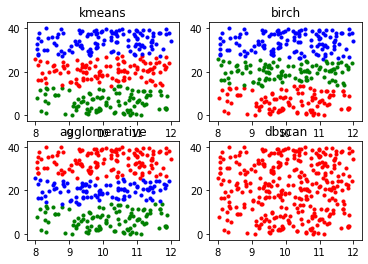

<Figure size 504x360 with 0 Axes>

In [1]:
# Visualize the clustering
# borrowed from https://scikit-learn.org/stable/auto_examples/cluster/plot_digits_linkage.html#sphx-glr-auto-
# examples-cluster-plot-digits-linkage-py

def plot_clustering(theData, kmeanLabels, brcLabels, aggLabels, dbLabels ):
	fig,ax = plt.subplots(2,2)

	for i in range(len(theData)):
		if kmeanLabels[i] == 0: theColor = 'red'
		if kmeanLabels[i] == 1: theColor = 'green'
		if kmeanLabels[i] == 2: theColor = 'blue'
		ax[0,0].scatter(theData[i][0],theData[i][1], s=9.5, alpha=1.0,color=theColor)
		ax[0,0].set_title('kmeans')

	for i in range(len(theData)):
		if brcLabels[i] == 0: theColor = 'blue'
		if brcLabels[i] == 1: theColor = 'red'
		if brcLabels[i] == 2: theColor = 'green'
		ax[0,1].scatter(theData[i][0],theData[i][1], s=9.5, alpha=1.0,color=theColor)
		ax[0,1].set_title('birch')

	for i in range(len(theData)):
		if aggLabels[i] == 0: theColor = 'red'
		if aggLabels[i] == 1: theColor = 'green'
		if aggLabels[i] == 2: theColor = 'blue'
		ax[1,0].scatter(theData[i][0],theData[i][1], s=9.5, alpha=1.0,color=theColor)
		ax[1,0].set_title('agglomerative')

	for i in range(len(theData)):
		if dbLabels[i] == 0: theColor = 'red'
		elif dbLabels[i] == 1: theColor = 'green'
		elif dbLabels[i] == 2: theColor = 'blue'
		else: theColor = 'pink'
		ax[1,1].scatter(theData[i][0],theData[i][1], s=9.5, alpha=1.0,color=theColor)
		ax[1,1].set_title('dbscan')

	plt.figure(figsize=(7, 5))
	plt.show()

numClusters = 3

df = pd.read_csv('outfile1.csv')
theData = df.to_numpy()

########## kmeans
print("\n\nStarting kmeans")
kmeans = KMeans(n_clusters=numClusters, random_state=0).fit(df)
print("\nkmeans.labels_ :")
print(kmeans.labels_)

# the following shows using the clusters to predict new point cluster locations
'''
print('means for the three clusters are:')
print(kmeans.cluster_centers_)
print('Using the clustering model to predict clusters now.')
print('kmeans.predict( [ [8,8], [19,19], [31,31]] ) returns: ')
print(kmeans.predict( [ [8,8], [19,19], [31,31]] ) )
'''
# the following shows using predict to divide data into clusters
# NOTE - a faster/better way is to just use the kmeans.labels_ array
'''
clusteredData = dict()
for i in range(numClusters):
	clusteredData[i] = list()
for i in theData:
	clusterNum = kmeans.predict( [ i ] )[0]
	clusteredData[clusterNum].append( i)
print("length of clusters:")
print(len(clusteredData[0]))
print(len(clusteredData[1]))
print(len(clusteredData[2]))
'''
########## birch
print("\n\nStarting Birch")
brc = Birch(n_clusters=numClusters).fit(df)
print("\nbrc.labels_ : ")
print(brc.labels_)

print('Using the birch model to predict clusters now.')
print('brc.predict( [ [8,8], [19,19], [31,31]] ) returns: ')
print(brc.predict( [ [8,8], [19,19], [31,31]] ) )
clusteredData = dict()
for i in range(numClusters):
	clusteredData[i] = list()
for i in theData:
	clusterNum = brc.predict( [ i ] )[0]
	clusteredData[clusterNum].append( i)
print("length of clusters:")
print(len(clusteredData[0]))
print(len(clusteredData[1]))
print(len(clusteredData[2]))

########## Agglomerative 
print("\n\nStarting Agglomerative ")
agg = AgglomerativeClustering(n_clusters=numClusters,linkage='ward').fit(df)
print("\nagg.labels_ :")
print(agg.labels_)

########## DBSCAN 
print("\n\nStarting DBSCAN ")
db = DBSCAN(eps=1.5, min_samples=4).fit(df)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
print("\ndb.labels_ :")
print(db.labels_)

###### compare them
theData = df.to_numpy()
plot_clustering(theData, kmeans.labels_ , brc.labels_, agg.labels_, db.labels_)



Starting kmeans

kmeans.labels_ :
[0 1 1 1 2 0 1 0 0 0 1 0 1 0 2 0 0 1 1 1 0 0 2 0 0 0 0 2 1 2 1 1 0 1 2 1 2
 1 1 2 2 0 0 1 0 0 1 1 1 0 0 0 2 0 1 1 0 1 1 0 2 0 1 1 1 2 0 2 2 2 1 0 0 1
 0 0 2 1 0 2 0 0 1 2 1 2 1 0 1 0 0 2 0 0 2 2 0 2 0 2 2 1 1 0 0 1 0 2 0 0 0
 0 0 1 0 2 1 1 1 0 0 0 1 0 0 2 2 1 0 1 2 0 1 0 2 0 2 1 2 2 0 0 1 0 1 2 1 2
 0 1 1 0 1 1 1 1 0 2 1 2 1 2 2 0 0 2 2 2 0 2 0 0 1 0 1 0 0 1 1 0 1 2 1 0 2
 2 1 1 1 0 0 2 2 1 2 0 1 2 0 2 0 0 0 1 2 2 1 1 2 1 0 2 2 2 1 0 1 0 1 2 0 0
 2 1 2 0 2 2 1 0 2 1 2 0 2 1 0 1 1 1 2 2 0 2 1 1 0 2 2 2 0 0 1 2 0 1 0 1 0
 1 1 1 2 1 0 1 2 1 0 0 0 1 2 2 0 1 2 1 0 1 2 1 1 2 0 2 1 1 1 1 2 0 2 1 0 2
 1 2 0 2 2 1 0 1 1 1 2 0 1 2 1 0 2 2 2 0 0 0]


Starting Birch

brc.labels_ : 
[0 1 1 1 2 0 1 0 0 0 1 0 1 0 2 0 0 0 1 1 0 0 2 0 0 0 0 2 1 2 1 1 0 1 2 1 2
 1 1 2 2 2 0 0 0 0 1 1 0 0 0 0 2 0 1 1 0 1 1 0 2 0 1 1 0 2 0 2 2 2 1 0 0 1
 0 0 2 1 0 2 0 0 1 2 1 2 1 0 1 0 0 2 0 0 2 2 0 2 0 2 2 1 1 0 0 0 0 2 0 0 0
 0 0 1 0 2 1 0 0 0 0 0 1 0 0 2 2 1 0 1 2 0 0 0 2 0 2 1 2 2 0

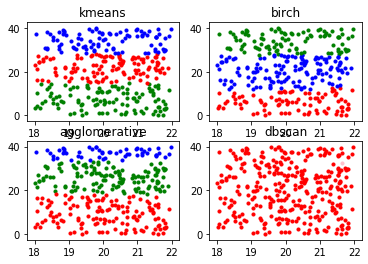

<Figure size 504x360 with 0 Axes>

In [5]:
numClusters = 3

df = pd.read_csv('outfile2.csv')
theData = df.to_numpy()

########## kmeans
print("\n\nStarting kmeans")
kmeans = KMeans(n_clusters=numClusters, random_state=0).fit(df)
print("\nkmeans.labels_ :")
print(kmeans.labels_)

# the following shows using the clusters to predict new point cluster locations
'''
print('means for the three clusters are:')
print(kmeans.cluster_centers_)
print('Using the clustering model to predict clusters now.')
print('kmeans.predict( [ [8,8], [19,19], [31,31]] ) returns: ')
print(kmeans.predict( [ [8,8], [19,19], [31,31]] ) )
'''
# the following shows using predict to divide data into clusters
# NOTE - a faster/better way is to just use the kmeans.labels_ array
'''
clusteredData = dict()
for i in range(numClusters):
	clusteredData[i] = list()
for i in theData:
	clusterNum = kmeans.predict( [ i ] )[0]
	clusteredData[clusterNum].append( i)
print("length of clusters:")
print(len(clusteredData[0]))
print(len(clusteredData[1]))
print(len(clusteredData[2]))
'''
########## birch
print("\n\nStarting Birch")
brc = Birch(n_clusters=numClusters).fit(df)
print("\nbrc.labels_ : ")
print(brc.labels_)

print('Using the birch model to predict clusters now.')
print('brc.predict( [ [8,8], [19,19], [31,31]] ) returns: ')
print(brc.predict( [ [8,8], [19,19], [31,31]] ) )
clusteredData = dict()
for i in range(numClusters):
	clusteredData[i] = list()
for i in theData:
	clusterNum = brc.predict( [ i ] )[0]
	clusteredData[clusterNum].append( i)
print("length of clusters:")
print(len(clusteredData[0]))
print(len(clusteredData[1]))
print(len(clusteredData[2]))

########## Agglomerative 
print("\n\nStarting Agglomerative ")
agg = AgglomerativeClustering(n_clusters=numClusters,linkage='ward').fit(df)
print("\nagg.labels_ :")
print(agg.labels_)

########## DBSCAN 
print("\n\nStarting DBSCAN ")
db = DBSCAN(eps=1.5, min_samples=4).fit(df)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
print("\ndb.labels_ :")
print(db.labels_)

###### compare them
theData = df.to_numpy()
plot_clustering(theData, kmeans.labels_ , brc.labels_, agg.labels_, db.labels_)



Starting kmeans

kmeans.labels_ :
[2 2 1 0 2 1 0 1 0 0 0 2 1 0 0 2 0 1 0 1 0 2 0 1 0 0 0 0 2 1 0 0 0 2 2 1 2
 1 0 1 2 0 1 0 0 0 0 2 2 0 2 2 1 2 1 0 0 2 1 2 1 0 2 0 2 1 0 0 1 0 0 1 1 0
 2 0 1 2 0 1 0 1 2 0 1 2 0 0 1 1 0 1 2 0 1 0 2 0 2 1 0 0 0 2 2 2 1 0 1 0 0
 1 1 0 0 0 1 1 1 2 1 2 1 2 1 1 0 1 1 1 0 0 2 0 2 1 1 1 2 2 2 2 2 2 0 1 2 0
 2 2 1 1 0 2 2 1 1 0 0 0 2 0 2 2 0 0 2 1 2 0 2 0 0 0 2 0 0 1 2 1 2 0 0 0 0
 1 2 0 0 2 0 1 2 2 2 2 0 0 2 1 1 0 1 1 2 1 0 1 0 0 0 1 2 1 0 0 1 0 0 2 1 1
 1 1 0 2 2 2 1 0 1 1 2 2 2 2 0 0 2 1 2 2 0 2 2 2 1 0 0 1 0 2 0 0 2 1 0 2 1
 1 2 2 1 2 2 1 0 2 0 2 2 1 0 0 2 1 1 0 2 2 2 2 1 0 2 2 1 0 1 2 0 2 2 2 0 2
 0 0 2 0 0 2 0 2 1 0 1 1 1 1 0 0 2 0 1 2 1 0 0 2 2 0 1 0 1 1 2 0 1 0 2 0 2
 1 2 2 1 1 2 0 0 2 2 0 0 1 2 0 0 2 1]


Starting Birch

brc.labels_ : 
[0 1 0 2 0 0 2 0 2 2 2 1 0 2 1 1 2 0 2 0 2 0 1 0 2 1 2 1 1 0 1 1 2 0 0 0 1
 0 2 0 1 2 0 1 2 2 1 0 0 2 0 1 0 1 0 1 2 0 0 0 0 2 1 1 0 0 2 2 0 2 2 0 0 1
 0 1 0 0 2 0 1 0 0 1 0 1 1 1 0 0 1 0 0 2 0 2 0 1 1 0 2 1 2 1 0 1 0 2

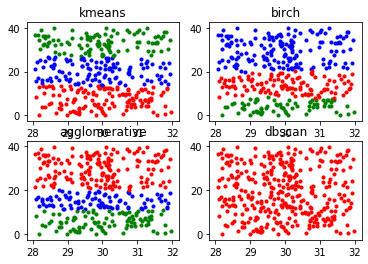

<Figure size 504x360 with 0 Axes>

In [7]:
numClusters = 3

df = pd.read_csv('outfile3.csv')
theData = df.to_numpy()

########## kmeans
print("\n\nStarting kmeans")
kmeans = KMeans(n_clusters=numClusters, random_state=0).fit(df)
print("\nkmeans.labels_ :")
print(kmeans.labels_)

# the following shows using the clusters to predict new point cluster locations
'''
print('means for the three clusters are:')
print(kmeans.cluster_centers_)
print('Using the clustering model to predict clusters now.')
print('kmeans.predict( [ [8,8], [19,19], [31,31]] ) returns: ')
print(kmeans.predict( [ [8,8], [19,19], [31,31]] ) )
'''
# the following shows using predict to divide data into clusters
# NOTE - a faster/better way is to just use the kmeans.labels_ array
'''
clusteredData = dict()
for i in range(numClusters):
	clusteredData[i] = list()
for i in theData:
	clusterNum = kmeans.predict( [ i ] )[0]
	clusteredData[clusterNum].append( i)
print("length of clusters:")
print(len(clusteredData[0]))
print(len(clusteredData[1]))
print(len(clusteredData[2]))
'''
########## birch
print("\n\nStarting Birch")
brc = Birch(n_clusters=numClusters).fit(df)
print("\nbrc.labels_ : ")
print(brc.labels_)

print('Using the birch model to predict clusters now.')
print('brc.predict( [ [8,8], [19,19], [31,31]] ) returns: ')
print(brc.predict( [ [8,8], [19,19], [31,31]] ) )
clusteredData = dict()
for i in range(numClusters):
	clusteredData[i] = list()
for i in theData:
	clusterNum = brc.predict( [ i ] )[0]
	clusteredData[clusterNum].append( i)
print("length of clusters:")
print(len(clusteredData[0]))
print(len(clusteredData[1]))
print(len(clusteredData[2]))

########## Agglomerative 
print("\n\nStarting Agglomerative ")
agg = AgglomerativeClustering(n_clusters=numClusters,linkage='ward').fit(df)
print("\nagg.labels_ :")
print(agg.labels_)

########## DBSCAN 
print("\n\nStarting DBSCAN ")
db = DBSCAN(eps=1.5, min_samples=4).fit(df)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
print("\ndb.labels_ :")
print(db.labels_)

###### compare them
theData = df.to_numpy()
plot_clustering(theData, kmeans.labels_ , brc.labels_, agg.labels_, db.labels_)

What to turn in:

A pdf file containing:
- a table of your metrics
- a description of what these metrics tell you about the clustering?